# Pymaceuticals Inc.

__________________________________________________________________________________________

### Analysis

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='right')
new_column_order = ['Mouse ID','Timepoint','Tumor Volume (mm3)','Metastatic Sites','Drug Regimen','Sex','Age_months','Weight (g)']
merged_df = merged_df[new_column_order].copy()

# Display the data table for preview
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [4]:
mice_count = merged_df['Mouse ID'].nunique()
mice_count

249

In [5]:
duplicate_row = merged_df[merged_df.duplicated(subset = ['Mouse ID','Timepoint'], keep=False)]
duplicate_mouse = duplicate_row['Mouse ID'].unique()

duplicate_mouse


array(['g989'], dtype=object)

In [6]:

duplicate_mouse_data = merged_df[merged_df['Mouse ID'] == 'g989']
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
mouse_to_drop = 'g989'
 
clean_study_data = merged_df[merged_df['Mouse ID'] != mouse_to_drop]
clean_study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
clean_mouse_count = clean_study_data['Mouse ID'].nunique()
clean_mouse_count

248

## Summary Statistics

In [9]:
summary_statistics = clean_study_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem']).reset_index()

summary_statistics.columns = ['Drug Regimen', 'Mean Tumor Volume', 'Median Tumor Volume','Tumor Volume Variance', 'Tumor Volume Std. Dev.', 'Tumor Volume Std. Err.']
summary_statistics_sorted = summary_statistics.set_index("Drug Regimen", drop=True)
summary_statistics_sorted

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
summary_statistics = clean_study_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

columns = pd.MultiIndex.from_product([['Tumor Volume (mm3)'], ['mean', 'median', 'var', 'std', 'sem']])

summary_statistics_with_title = pd.DataFrame(data=summary_statistics.values, columns=columns, index=summary_statistics.index)


summary_statistics_with_title

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

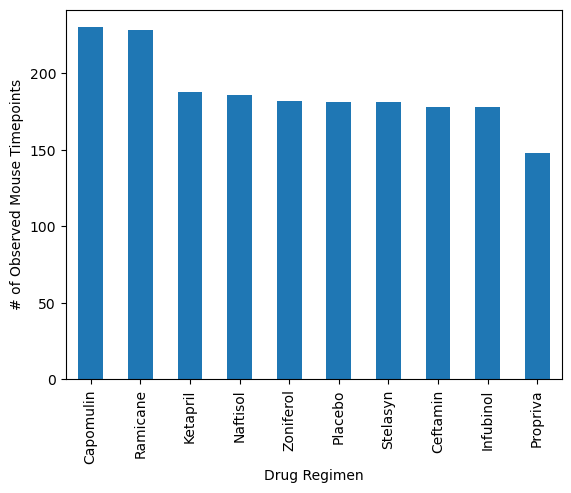

In [11]:
mouse_count_by_regimen = clean_study_data.groupby('Drug Regimen')['Mouse ID'].count()
mouse_count_by_regimen_sorted = mouse_count_by_regimen.sort_values(ascending=False)

mouse_count_by_regimen_sorted.plot(kind='bar')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

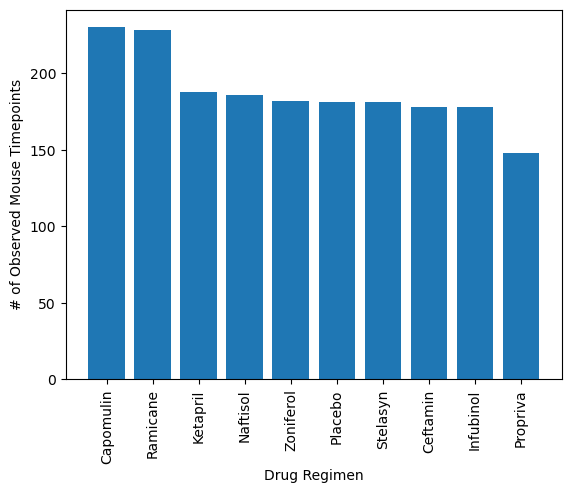

In [12]:

ax = plt.axes()
bars = ax.bar(mouse_count_by_regimen_sorted.index, mouse_count_by_regimen_sorted)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.show()

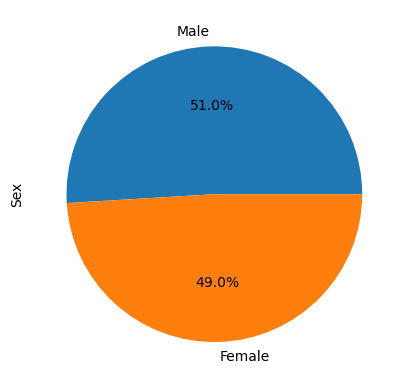

In [13]:
gender_difference = clean_study_data['Sex'].value_counts()

gender_difference.plot.pie(autopct='%1.1f%%')
plt.ylabel('Sex')

plt.show()

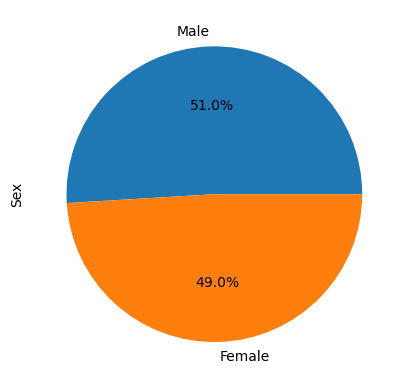

In [14]:
gender_distribution = clean_study_data['Sex'].value_counts()
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
four_treatments = ['Capomulin','Ramicane','Infubinol','Ceftamin']
four_treatment_df = clean_study_data[clean_study_data['Drug Regimen'].isin(four_treatments)]
max_timepoints = four_treatment_df.groupby(['Mouse ID','Drug Regimen'])['Timepoint'].max().reset_index()
MouseID_last_treat_df = pd.merge(max_timepoints, four_treatment_df, on=['Mouse ID', 'Drug Regimen','Timepoint'], how='left')[['Mouse ID','Timepoint']]
final_tumor_vol_df = pd.merge(MouseID_last_treat_df, clean_study_data, on=['Mouse ID', 'Timepoint'], how='left')
final_tumor_vol_df



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [16]:
tumor_vol_data = []

for treatment in four_treatments:
    subset_data = final_tumor_vol_df[final_tumor_vol_df['Drug Regimen'] ==treatment]['Tumor Volume (mm3)']
    tumor_vol_data.append(subset_data)

    quartiles = subset_data.quantile([0.25, 0.5,0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q 

    lower_bound = lower_q - 1.5 * iqr 
    upper_bound = upper_q + 1.5 * iqr
    outliers = subset_data[(subset_data < lower_bound) | (subset_data > upper_bound)]

 
    display(f"Potential outliers for {treatment}: {outliers}")
    


'Potential outliers for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)'

'Potential outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)'

'Potential outliers for Infubinol: 15    36.321346\nName: Tumor Volume (mm3), dtype: float64'

'Potential outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)'

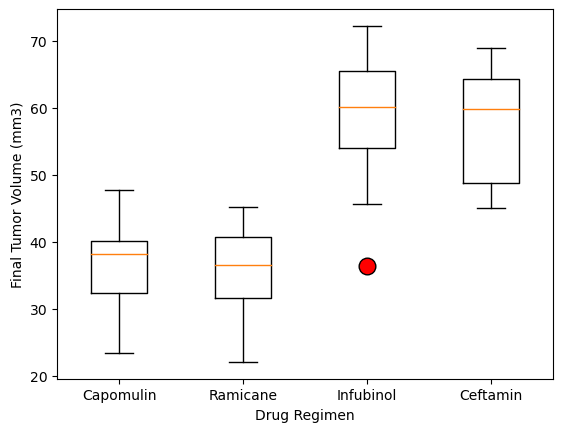

In [17]:
fig, ax = plt.subplots()
ax.boxplot(tumor_vol_data, labels=four_treatments, flierprops=dict(marker='o', markerfacecolor='red',markersize=12))
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots 

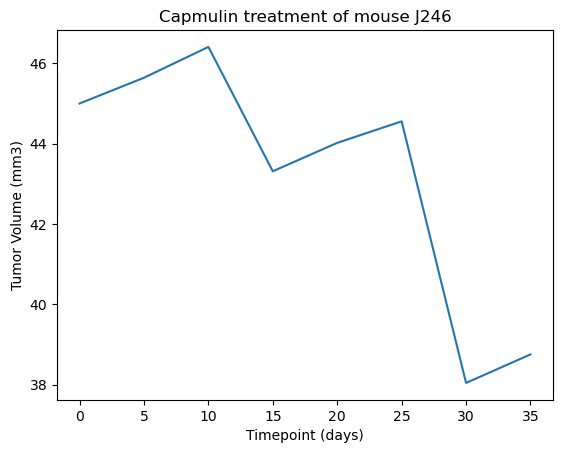

In [25]:
capomulin_data = clean_study_data[clean_study_data['Drug Regimen'] =='Capomulin']
mouse_id_capomulin = capomulin_data['Mouse ID'].unique()    
selected_mouse_data = capomulin_data[capomulin_data['Mouse ID'] == 'j246']
    
plt.plot(selected_mouse_data['Timepoint'], selected_mouse_data['Tumor Volume (mm3)'], linestyle='-')

plt.title(f'Capmulin treatment of mouse J246')
plt.xlabel('Timepoint (days)')

plt.ylabel('Tumor Volume (mm3)')
plt.show()


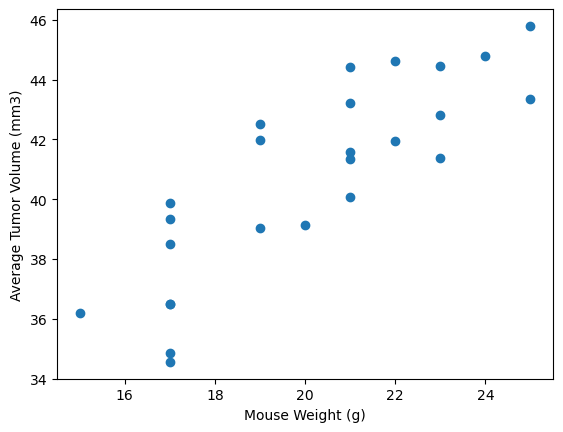

In [19]:
capomulin_data = clean_study_data[clean_study_data['Drug Regimen'] == 'Capomulin']

average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()

capomulin_avg_data = pd.merge(average_tumor_volume, capomulin_data[['Mouse ID', 'Weight (g)']].drop_duplicates(), on='Mouse ID')

plt.scatter(capomulin_avg_data['Weight (g)'], capomulin_avg_data['Tumor Volume (mm3)'])
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

The correlation between mouse weight and the average tumor volume is 0.84


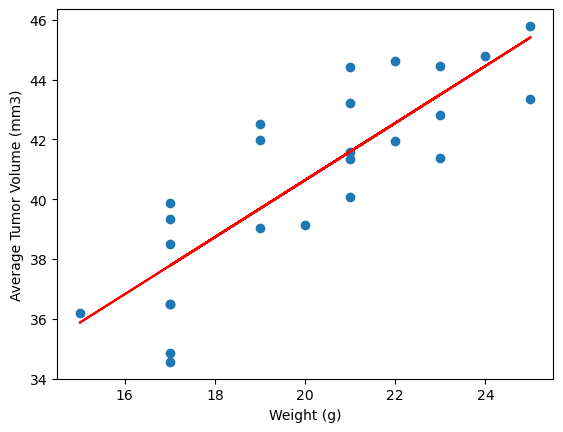

In [20]:
from scipy.stats import linregress
capomulin_data = clean_study_data[clean_study_data['Drug Regimen'] == 'Capomulin']
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()
capomulin_avg_data = pd.merge(average_tumor_volume, capomulin_data[['Mouse ID', 'Weight (g)']].drop_duplicates(), on='Mouse ID')


plt.scatter(capomulin_avg_data['Weight (g)'], capomulin_avg_data['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')


correlation_coefficient = capomulin_avg_data['Weight (g)'].corr(capomulin_avg_data['Tumor Volume (mm3)'])
print(f'The correlation between mouse weight and the average tumor volume is{correlation_coefficient: .2f}')


slope, intercept, r_value, p_value, std_err = linregress(capomulin_avg_data['Weight (g)'], capomulin_avg_data['Tumor Volume (mm3)'])
plt.plot(capomulin_avg_data['Weight (g)'], slope * capomulin_avg_data['Weight (g)'] + intercept, color='red', label='Linear Regression')
plt.show()